In [1]:
from IPython.display import Image

In [2]:
class capacity_estimator():
    
    def __init__(self):
        pass
    
    def estimate(self, num_inputs, neurons):
        """
        Estimates the Memory-Equivalent Capacity (MEC) *in bits* of a fully-connected neural network by practically sizing it 
        using the methods presented by Gerald Friedland, Mario Michael Krell & Alfredo Metere in 'A Practical Approach 
        to Sizing Neural Networks' in Lawrence Livermore National Laboratory publication LLNL-TR-758456.

        Arguments:
        > num_inputs: Number of inputs.
        > neurons: Numbers of neurons in the following fully connected layers.

        The four rules to capacity estimation are the following:
        1. The output of a perceptron is maximally 1 bit.
        2. The maximum memory capacity of a perceptron is the number of parameters in bits (MacKay '03).
        3. The maximum memory capacity of perceptrons in parallel is additive (MacKay '03 and Friedland '17).
        4. The maximum memory capacity of a layer of perceptrons depending on a previous layer of perceptrons is limited by
           the maximum output in bits of the previous layer (Data Processing Inequality, Tishby '12).
        """
        assert(len(neurons) >= 1, 'There has to be atleast 1 neuron')
        capacity = []

        first_layer_capacity = (num_inputs + 1) * neurons[0]
        capacity.append(first_layer_capacity)
        for i in range(1, len(neurons)):
            layer_capacity = (neurons[i-1] + 1) * neurons[i]
            layer_capacity = min(neurons[i-1], layer_capacity)
            capacity.append(layer_capacity)
        return sum(capacity)

<>:23: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:23: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:23: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<ipython-input-2-213be0b2c58a>:23: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(neurons) >= 1, 'There has to be atleast 1 neuron')


In [3]:
ce = capacity_estimator()

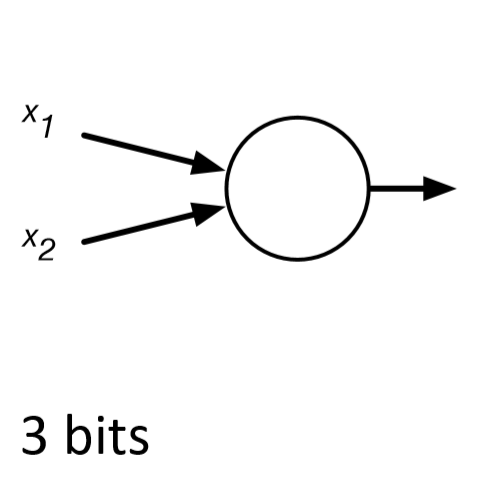

In [4]:
Image(filename='simple_perceptron.png', width=200, height=150)

In [5]:
ce.estimate(2, [1]) # Works, yahoo!

3

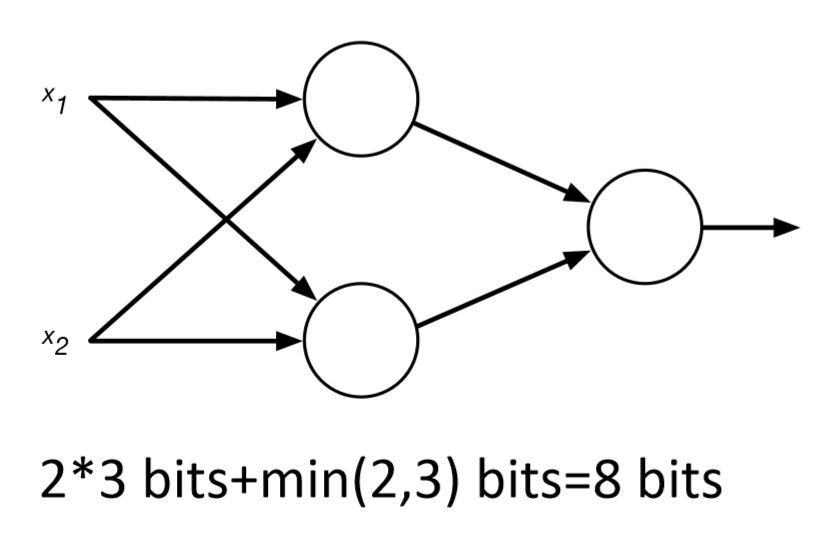

In [6]:
Image(filename='two_layers.png', width=300, height=150)

In [7]:
ce.estimate(2, [2, 1]) # Still works, yahoo!

8

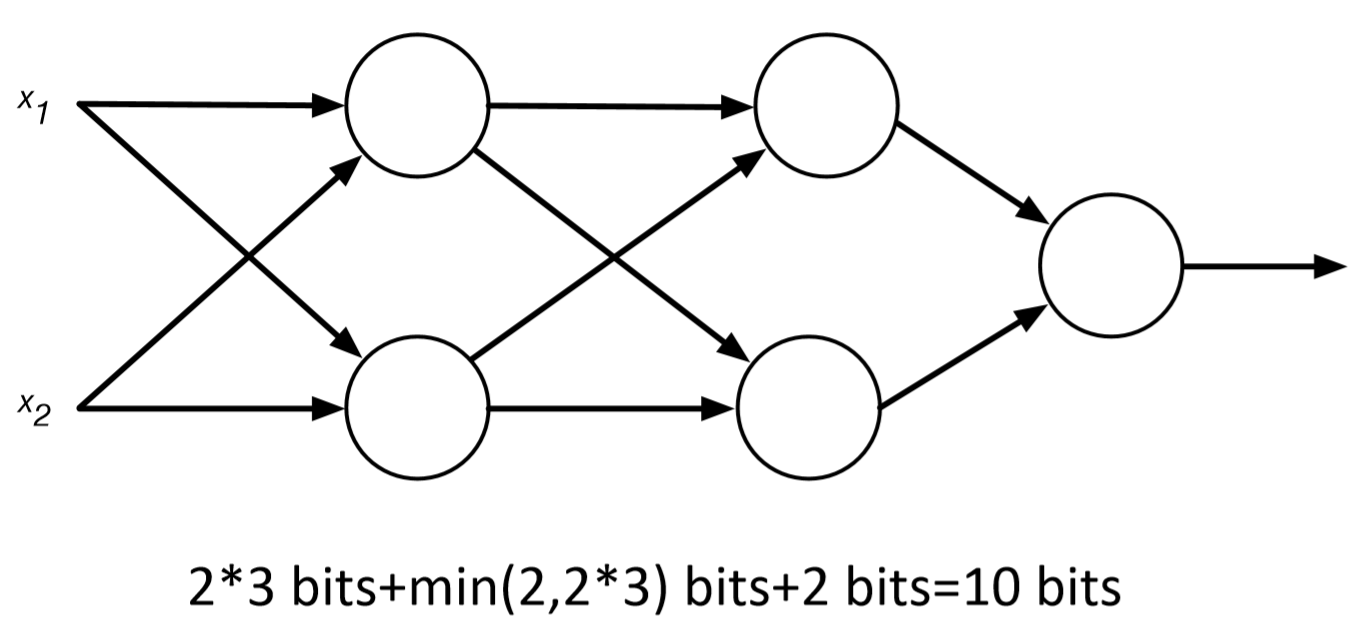

In [8]:
Image(filename='three_layers.png', width=350, height=150)

In [9]:
ce.estimate(2, [2, 2, 1]) # Let's dance around town!

10

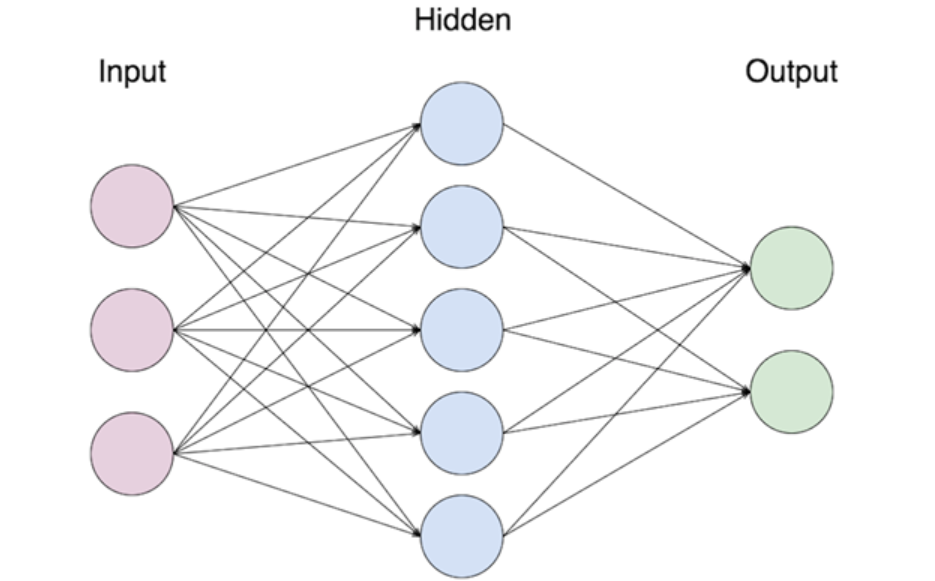

In [10]:
Image(filename='colored_three_layers.png', width=350, height=150)

In [11]:
ce.estimate(3, [5, 2])

25